# Greedy Algorithmen

<div class="introduction">
TODO: Einleitung
</div>

## Bruchteilrucksack

<div class="general-text">
TODO: Bruchteilrucksackbeschreibung    
</div>

In [1]:
def bagpack(size):
    sortedItems = sort(items)
    return bagpackRec(size, sortedItems)

def bagpackRec(size, sortedItems):
    if size < sortedItems[0][1]:
        return sortedItems[0][0] * (size / sortedItems[0][1])
    else:
        return sortedItems[0][0] + bagpackRec((size - sortedItems[0][1]),sortedItems[1:])

def sort(list): #Mergesort
    if len(list) < 2:
        return list
    else:
        lList = list[:int(len(list)/2)] # left List
        rList = list[int(len(list)/2):] # right list
        return merge(sort(lList), sort(rList))

def merge(lList, rList):
    if len(lList) == 0:
        return rList
    if len(rList) == 0:
        return lList
    if vaWeCo(lList[0]) > vaWeCo(rList[0]):
        result = [lList[0]]
        return  result + merge(lList[1:],rList)
    else:
        result = [rList[0]]
        return result + merge(lList,rList[1:])

def vaWeCo(pair): # ValueWeight Coefficient
    value, weight = pair
    return value / weight

items = [(7, 4),(1, 9),(9, 6), (6, 8), (1, 3), (5, 2), (7, 8)] # All items that may be contained in the bagpack
    # first is value, second is weight
    # no negative values or 0 for weight

print(bagpack(15))

23.625


## Geldwechselproblem

<div class="general-text">
TODO: Geldwechselproblembeschreibung
</div>

In [3]:
def currencyExchangeRec(balance, candidates):
    if balance == 0:
        return []
    if (balance >= 0) and (len(candidates) == 0):
        return ['Failed']
    else:
        if balance >= candidates[0]:
            temp = [candidates[0]]
            return temp + currencyExchangeRec((balance - candidates[0]), candidates)
        else:
            return currencyExchangeRec(balance, candidates[1:])

def currencyExchange(balance, candidates):
    res = currencyExchangeRec(balance, candidates)
    if res[len(res)-1] == 'Failed':
        print('No exchange possible.')
    else:
        print(res)
        print(len(res))

balance = 985 #The value of the whole amount of money you want to change
candidates = [200, 100, 50, 20, 10, 5] #The value of each coin, e.g. 2€, 1€, 50ct...

currencyExchange(balance, candidates)

[200, 200, 200, 200, 100, 50, 20, 10, 5]
9


## Algorithmus von Dijkstra

<div class="general-text">
TODO: Dijkstrabeschreibung
</div>

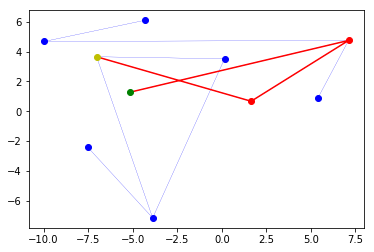

In [6]:
# Dijkstra
import random
import math
import matplotlib.pyplot as plt

# functions to keep the dijkstraalgorithm readable

def distanceEdge(start, i, points, edges):
    for edge in edges:
        if (edge[0] == start and edge[1] == i) or (edge[1] == start and edge[0] == i):
            return edge[2]
    return float("inf")

def getIndexWithOutResult(points, result):
    returnList = []
    for i in range(0, len(points)):
        if i not in result:
            returnList.append(i)
    return returnList

def getWithOutResults(points, result):
    returnList = list(points)
    delList = list(result)
    delList.sort()
    delList.reverse()
    for res in delList:
        del returnList[res]
    return returnList

def vWithMinDistance(points, distance, indexArray):
    minDistance = distance[0]
    minPoint = 0
    for i in range(1,len(points)):
        if distance[i] < minDistance:
            minDistance = distance[i]
            minPoint = i
    return indexArray[minPoint]

def calcDistance(point1, point2):
    a = abs(point1[0] - point2[0])
    b = abs(point1[1] - point2[1])
    c_2 = a * a + b * b
    return math.sqrt(c_2)

# algorithm of dijkstra ----------------------------------------------

def dijkstra(points, edges):
    start = 0
    end = len(points)-1
    s = [start]
    distance = []
    previous = []
    for i in range(0, len(points)):
        if i != s[0]:
            distance.append(distanceEdge(start, i, points, edges))
            previous.append(start)
        else:
            distance.append(0)
            previous.append(i)

    while end not in s:
        pointsWithOutResults = getWithOutResults(points, s)
        distanceWithOutResults = getWithOutResults(distance, s)
        indexArray = getIndexWithOutResult(points, s)
        v_ = vWithMinDistance(pointsWithOutResults, distanceWithOutResults, indexArray)
        s.append(v_)
        pointsWithOutResults = getIndexWithOutResult(points, s)
        for vertex in pointsWithOutResults:
            if distance[v_] + distanceEdge(v_, vertex, points, edges) < distance[vertex]:
                distance[vertex] = distance[v_] + distanceEdge(v_, vertex, points, edges)
                previous[vertex] = v_
    result = []
    result.append(end)
    finished = False
    while not finished:
        temp = previous[result[len(result)-1]]
        result.append(temp)
        if temp == start:
            finished = True
    result.reverse()
    return result

# generating points and edges ----------------------------------------

points = []                 #(x,y), the index is the name
numberOfPoints = 10         #number of points generated
maxConnections = 1          #number of connection, that will generated for each point1
edges = []                  #(indexPoint1, indexPoint2, weight)

for i in range(0, numberOfPoints):
    points.append((random.uniform(-10,10), random.uniform(-10,10)))
    
def getPossibleConnections(edges, x, length):
    tempResult = []
    result = []
    for edge in edges:
        if edge[1] == x:
            tempResult.append(edge[0])
    for i in range(0, length):
        if i not in tempResult and i != x:
            result.append(i)
    return result

for i in range(0, len(points)):
    k = 0
    possibleConnections = getPossibleConnections(edges, i, len(points))
    if maxConnections < 1:
        maxConnections = 1
    n = round(random.uniform(1, maxConnections))
    while k < n:
        j = possibleConnections[round(random.uniform(0, len(possibleConnections)-1))]
        edges.append((i, j, calcDistance(points[i], points[j])))
        possibleConnections.remove(j)
        k = k + 1

dijkstraWay = []

# execute ------------------------------------------------------------

dijkstraWay = dijkstra(points, edges)

# Plotting -----------------------------------------------------------

fig = plt.subplot()

pointsX = []
pointsY = []

for point in points:
    pointsX.append(point[0])
    pointsY.append(point[1])

for edge in edges:
    tempX = [points[edge[0]][0], points[edge[1]][0]]
    tempY = [points[edge[0]][1], points[edge[1]][1]]
    fig.plot(tempX, tempY, "r", color="blue", linewidth="0.2")

dijkstraPointsX = []
dijkstraPointsY = []

for index in dijkstraWay:
    dijkstraPointsX.append(points[index][0])
    dijkstraPointsY.append(points[index][1])

fig.plot(dijkstraPointsX, dijkstraPointsY, "r", color="red")

for i in range(0, len(pointsX)):
    if i in dijkstraWay:
        if i == dijkstraWay[0]:
            fig.plot(pointsX[i], pointsY[i], "go")
        else:
            if i == dijkstraWay[len(dijkstraWay)-1]:
                fig.plot(pointsX[i], pointsY[i], "yo")
            else:
                fig.plot(pointsX[i], pointsY[i], "ro")
    else:
        fig.plot(pointsX[i], pointsY[i], "bo")

def reduceList(list):
    result = []
    for i in range(0, len(list)):
        if list[i] not in result:
            result.append(list[i])
    return result

plt.show()
